<a href="https://colab.research.google.com/github/marinamaer123/new_test/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HW_11_1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/yulu_rental.csv')

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [4]:
df.shape

(10886, 19)

In [5]:
df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [6]:
#Цей датасет містить 10886 рфдків та  19 колонок .Кожен рядок має високу гранулярність ,
#тому що кожен рядок відповідає одній годині спостережень
#також ми маємо колонки рік,місяць,день тижня

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [7]:
daily_count = df['count'].resample('D').sum()

In [8]:
daily_count.tail(30)

,count
datetime,
2012-11-20,0
2012-11-21,0
2012-11-22,0
2012-11-23,0
2012-11-24,0
2012-11-25,0
2012-11-26,0
2012-11-27,0
2012-11-28,0


In [9]:
daily_holiday = df['workingday'].resample('D').sum()

In [10]:
daily_holiday.tail(30)

,workingday
datetime,
2012-11-20,0
2012-11-21,0
2012-11-22,0
2012-11-23,0
2012-11-24,0
2012-11-25,0
2012-11-26,0
2012-11-27,0
2012-11-28,0


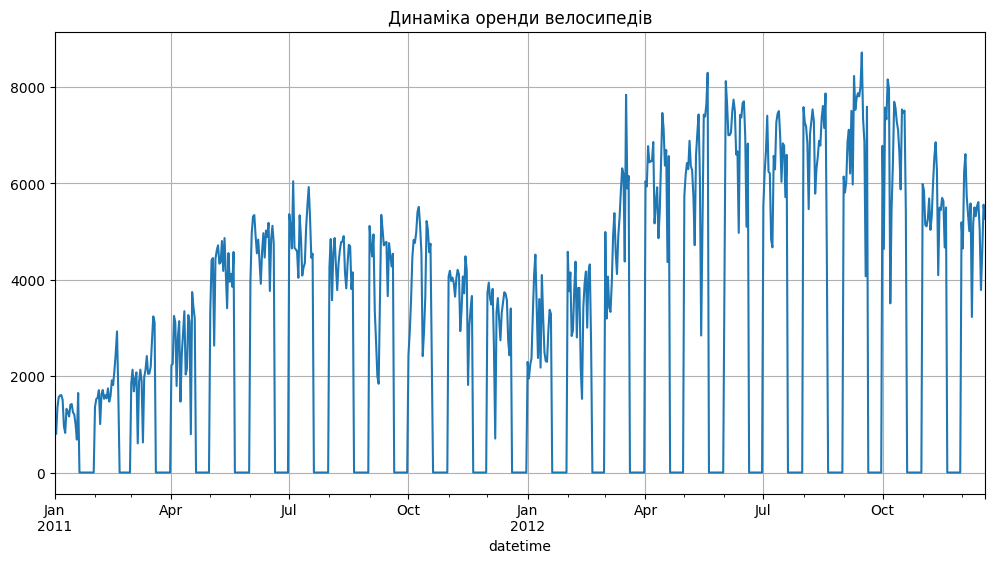

In [11]:
daily_count.plot.line(
    figsize = (12,6),
    title = 'Динаміка оренди велосипедів',
    grid = True
)
plt.show()

In [12]:
#Ці заломи це різниця між робочими та вихідними та  погодними умовами ,щоб позбутися заломів потрібно прибрати вихідні дні з даних для графіку.
#Загальна тенденція це те що попит на оренду зростає з часом та можемо побачити вплив сезонності,а саме більший попит в теплі місяці.
#Аномальні значення тут здебільшого пов'язані з погодою.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

In [13]:
quarterly_count = df['count'].resample('QE').mean().round(2)

In [14]:
quarterly_count.index = ('Q' + quarterly_count.index.quarter.astype(str)+ ' '
+ quarterly_count.index.year.astype(str))

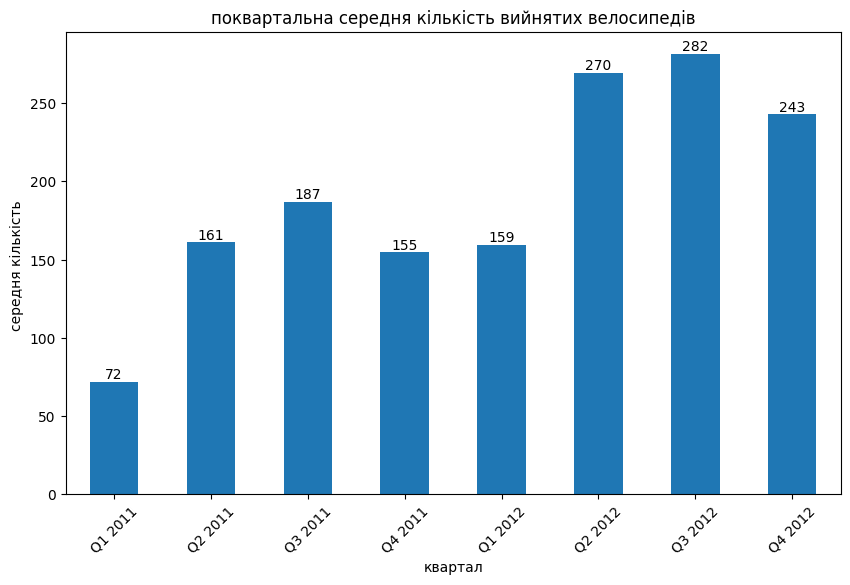

In [15]:
ax = quarterly_count.plot.bar(
    figsize = (10,6),
    title = 'поквартальна середня кількість вийнятих велосипедів',
    xlabel = 'квартал',
    ylabel = 'середня кількість '
)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.show()


In [16]:
#В третьому кварталі 2012 року нафбільшасередня кількість вийнятих велосипедів .
#Сезонна закономірність просто пояснюється тим,що тепла погода більш сприятлива для велопрогулянок.
# Різниця  майже в 4 рази (3.92)

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [17]:
monthly_count = df['count'].resample('ME').mean().round(2)

In [18]:
monthly_avg = df.groupby(df.index.month)['count'].mean().round(2)

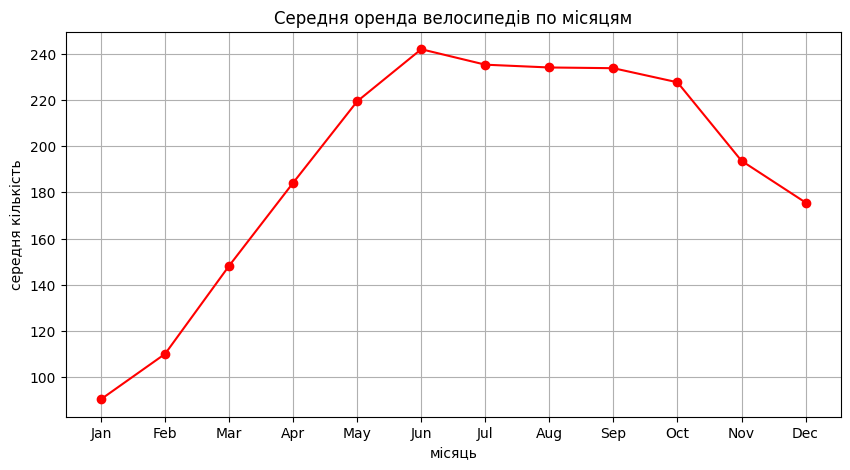

In [19]:
axi = monthly_avg.plot.line(
    color = 'red',
    marker ='o',
    figsize =(10,5)
)
axi.set_xticks(range(1,13))
axi.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Середня оренда велосипедів по місяцям')
plt.xlabel('місяць')
plt.ylabel ('середня кількість')
plt.grid(True)
plt.show()

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

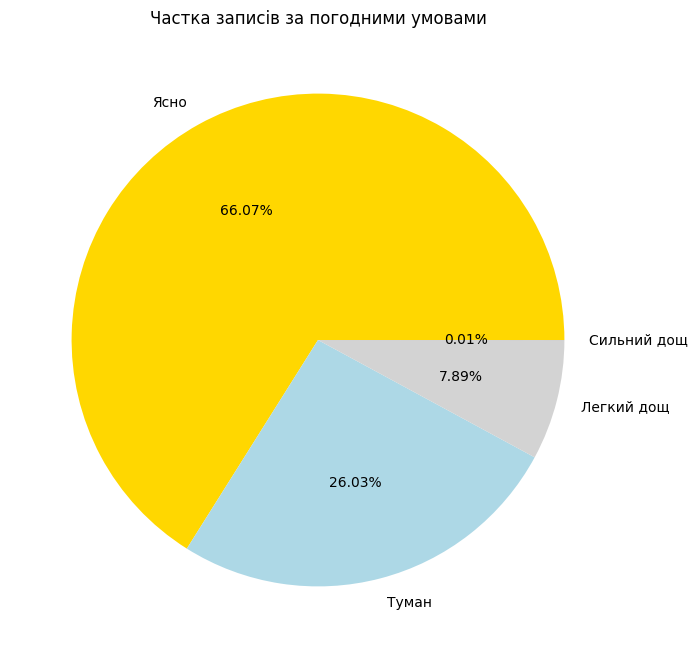

In [20]:
weather_count = df['weather'].value_counts()

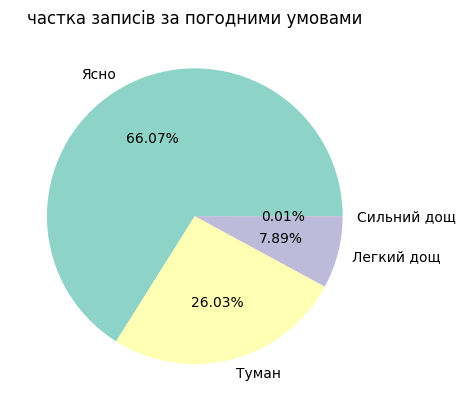

In [21]:
weather_count.plot.pie(
    autopct = '%1.2f%%',
    labels = ['Ясно','Tуман','Легкий дощ','Сильний дощ'],
    title = 'частка записів за погодними умовами',
    ylabel = '',
    colors = plt.cm.Set3.colors
)

plt.show()

In [22]:
#В датасеті переважно ясна погода,попри те туман зустрічається досить часто.
#Інколи легкий дощ та дуже рідко (декілька разів на рік ) сильний дощ
#Туман та дощі негативно впливають на попит оренди велосипедів,коли сонячна погода навпаки підіймає попит на оренду.
#

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

Text(0, 0.5, 'Погодні умови')

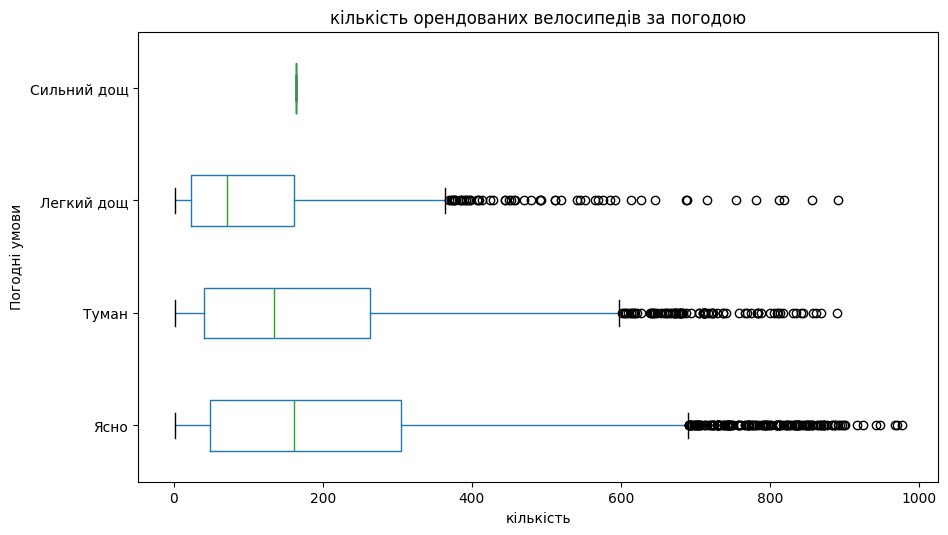

In [36]:
ax = df.boxplot(
    column ='count',
    by = 'weather',
    figsize = (10,6),
    grid = False ,
    vert=False
)
ax.set_yticklabels(['Ясно','Tуман','Легкий дощ','Сильний дощ'])
plt.suptitle('')
plt.title('кількість орендованих велосипедів за погодою')
plt.xlabel('кількість')
plt.ylabel('Погодні умови')

In [ ]:
#При ясній погоді найбільший розкид даних.Це видно з ширшого міжквартального діапазону та довших вусів .
#Викиди є при ясній погоді,тумані та легкому дощу.Це можуть бути дні з надвисоким попитом оренди .
#Найбільше  медіанне значення при ясній погоді. Це свідчить про стабільно вищий попит в порівнянні з іншими погодними умовами.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

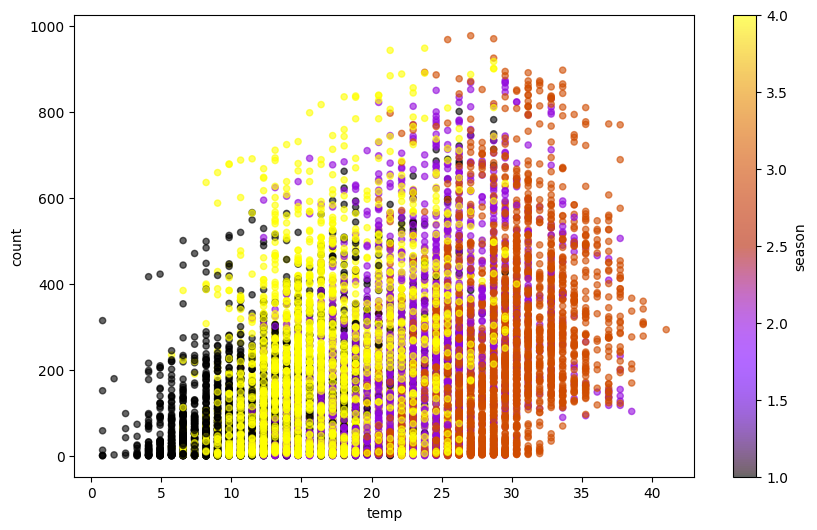

In [46]:
df.plot.scatter(
    x = 'temp',
    y = 'count',
    c = 'season',
    alpha = 0.6,
    figsize = (10,6),
    colormap='gnuplot'

)
plt.show()

In [ ]:
#Існує сильний позитивний кореляційний зв'язок між температурою та попитом в оренді

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [54]:
week_stats = df.groupby('weekday')[['casual','registered']].mean()

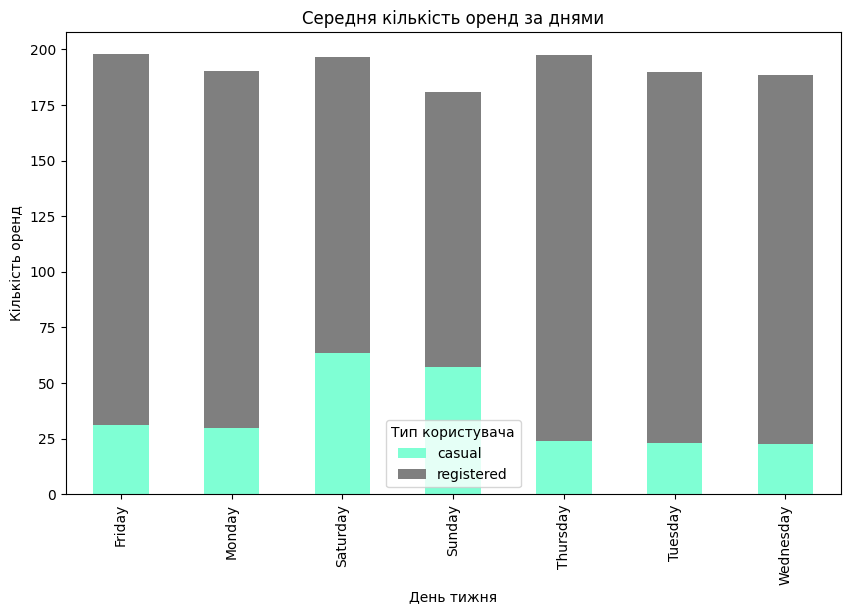

In [58]:
week_stats.plot.bar(
    figsize =(10,6),
    stacked = True,
    color = ['aquamarine','tab:gray']

)
plt.title('Середня кількість оренд за днями')
plt.xlabel('День тижня')
plt.ylabel('Кількість оренд')
plt.legend(title='Тип користувача')
plt.show()

In [23]:
#найбільше зареєстрованих користувачів у будні дні,можливо вони їздять на велосипеді на роботу або навчання.
#Це може бути пов'язано з тим що зареєстровані коритсувачі використовують сервіс для щоденних поїздок.
#Попре те на вихідних зростає попит саме для звичайних користувачів ,тому що вони використовують сервіс для дозвілля.